### change path below to your gdrive path where folder is 

In [ ]:
cd '/content/drive/MyDrive/pavement_competition'

/content/drive/MyDrive/pavement_competition


## Uncomment and run codes below if this is the first time running this notebook

In [ ]:
# !pip install -U PyYAML
# %pip install -qr dspYolov5/requirements.txt  # install dependencies for yolov5

     |████████████████████████████████| 247 kB 2.2 MB/s 


## If you annotated images from CVAT, uncomment block of codes in cell below to convert cvat annotations to yolo annotations

In [ ]:
# from dsps.simple_fxn import cvat2yolo
## location of cvat annotations
# json_file = 'cvat/annotations/instances_default.json'
# img_path = 'cvat/images'
# # converted yolo annotations will be stored in the paths below
# output_path = 'data/training'
# val_path = 'data/validation'
# cvat2yolo(json_file,img_path, output_path, val_path)

total number of classes: 20


## Train a new model

In [ ]:
import json
import torch
from IPython.display import Image, clear_output  # to display images

clear_output()
print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Setup complete. Using torch 1.9.0+cu102 (Tesla T4)


### run the code below. You may get an error the first time. restart the runtime and run again. 

In [ ]:
!python -i dspYolov5/train_dsps.py --data data/dsps.yaml --cfg models/dsps_model.yaml --batch-size 8 --device 0

train: weights=yolov5s.pt, cfg=models/dsps_model.yaml, data=data/dsps.yaml, hyp=data/hyps/hyp.scratch.yaml, epochs=150, batch_size=8, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=0, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=8, project=weights/train, entity=None, name=exp, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, upload_dataset=False, bbox_interval=-1, save_period=-1, artifact_alias=latest, local_rank=-1, freeze=0, patience=100
github: skipping check (not a git repository), for updates see https://github.com/ultralytics/yolov5
YOLOv5 🚀 v5.0-430-gaa18599 torch 1.9.0+cu102 CUDA:0 (Tesla T4, 15109.75MB)

hyperparameters: lr0=0.01, lrf=0.2, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015,

In [ ]:
# %run -i yolov5/train_dsps.py --data data/dsps.yaml --cfg models/dsps_model.yaml --batch-size 8 --device 0

### Evaluate and Visualize Model Performance

In [ ]:
!python 'dspYolov5/detect_dsps.py' --weights 'weights/train/exp/weights/best.pt' --img 640 --conf 0.25 --source data/test_images/

detect: weights=['weights/train/exp/weights/best.pt'], source=data/test_images/, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False
requirements: /content/drive/MyDrive/pavement_competition/requirements.txt not found, check failed.
YOLOv5 🚀 v5.0-430-gaa18599 torch 1.9.0+cu102 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
Model Summary: 224 layers, 7105153 parameters, 0 gradients
image 1/10 /content/drive/MyDrive/pavement_competition/data/test_images/0 (1).JPG: 640x352 2 Transvers Cracks, 1 Manholed, Done. (0.011s)
image 2/10 /content/drive/MyDrive/pavement_competition/data/test_images/0 (107).JPG: 640x352 4 Aligator Cracks, 1 Manholed, Done. (0.010s)
image 3/10 /content/drive/MyDrive/pavement_

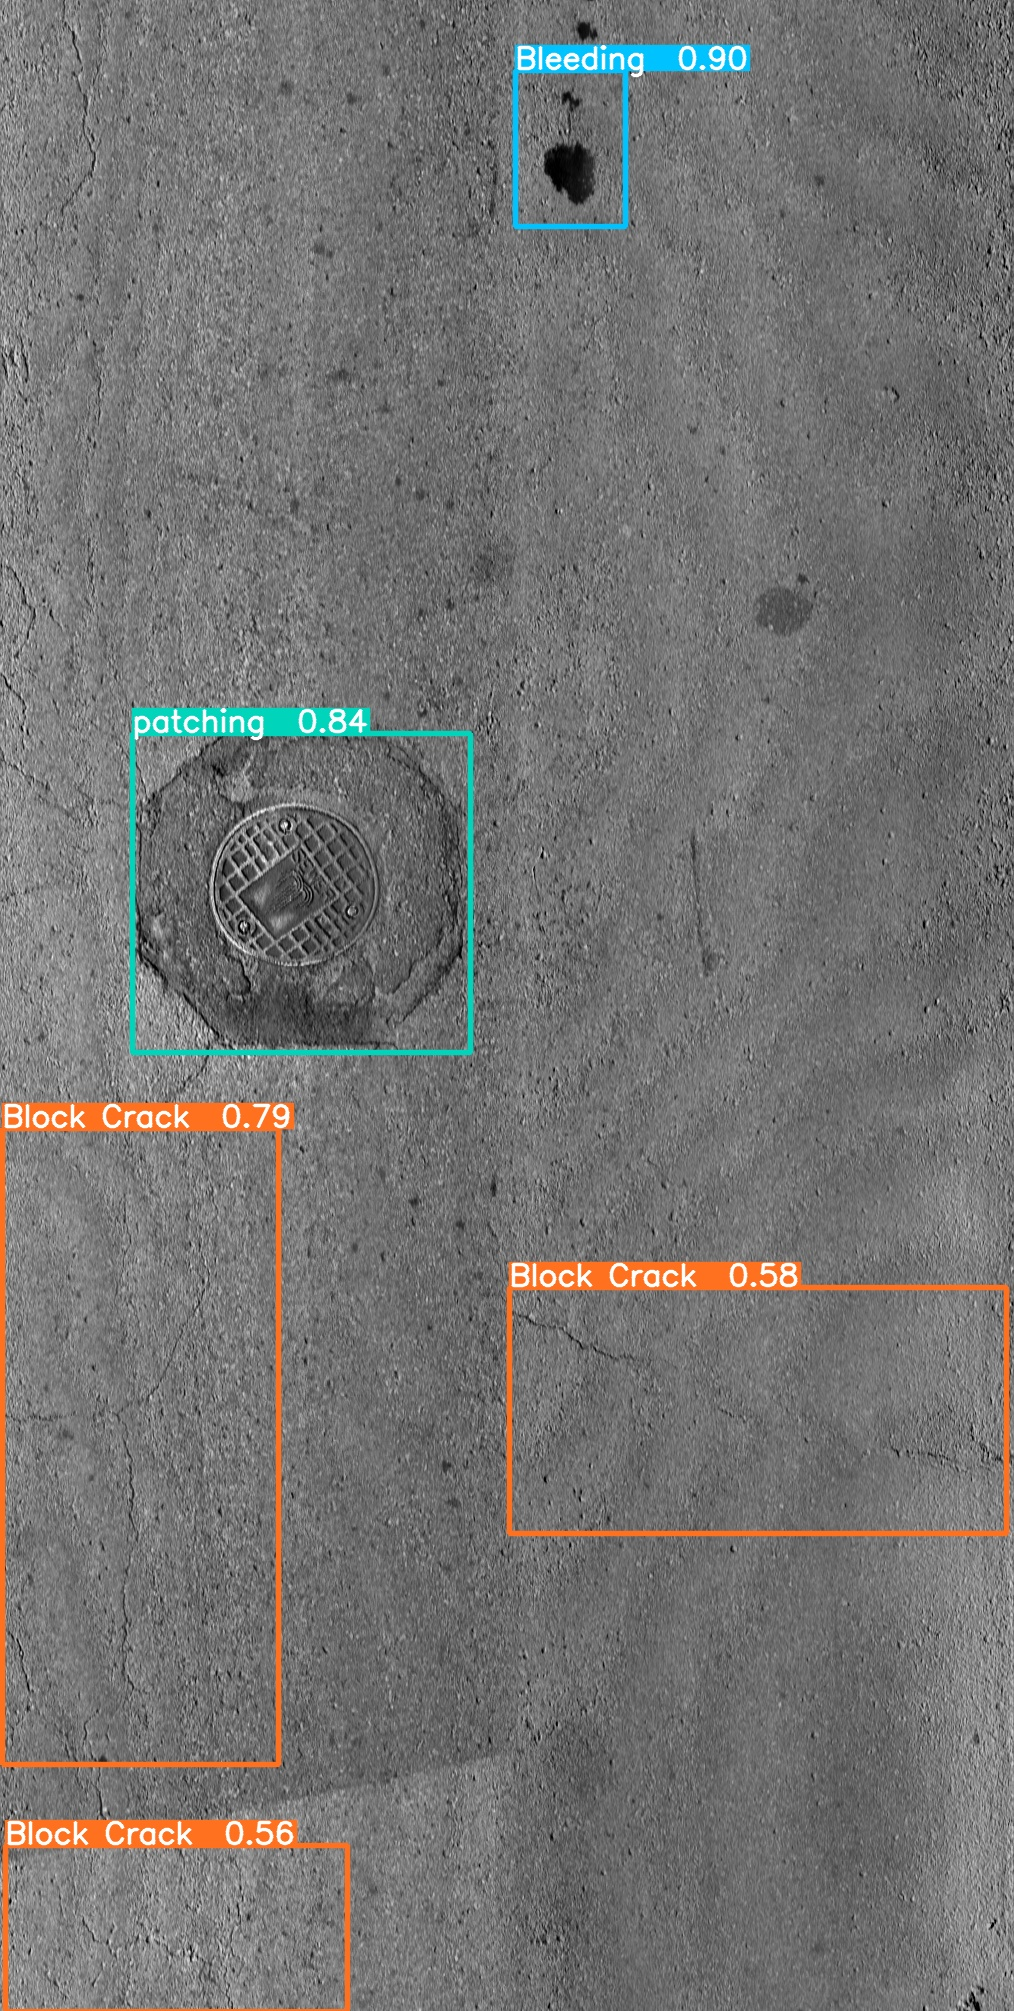

In [ ]:
Image(filename='results/images/0 (11).JPG', width=300)
# Image(filename='results/images/0 (1).JPG', width=300)